# <font color='purple'> Altcoin vs  Bitcoin Data analysis project </font>
____
##  <font color='green'> Strategy </font> 

#### 1. Trigger for opening a position
- Dato almeno 2 giorni positivi (2 barre verdi ad alto volume) e con un corpo ampio, che devono essere prima di una rossa ad 1D.
- La candela rossa deve avere range R che puo' essere di diversa natura: 
    - R =  Range di prezzo fra Fibonacci al livello sotto 0.5 fino al livello sopra. 
    - R =  Corpo candela rossa / ( corpo candela verde 1 + corpo candela verde 2 )  



#### 2. Open Position
    When the trigger is activated:
  - BUY BTC : Spot account Binance
  - OPEN Short position with Altcoin: Perpetual Binance Futures
  
#### 3. Trigger for closing a position
   - Hit Take Profit (TP) or Stop Loss (SL)
   - Close for too long past 

#### 4. Close Position
  - SELL BTC : Spot account Binance
  - CLOSE Short position with Altcoin: Perpetual Binance Future

___
____
____


### <font color='green'> Caratteristiche strategia: </font>  
1. Per lo short guadagni 0.15% ogni 8h. E quello sarebbe l'unico guadagno, dato che compri assieme anche BTC (spot account).
2. Dopo che le altcoin (vs BTC) salgono tantissimo, di solito scendono dopo un picco.
3. Timeframe 4h/1D

___
____
____


###  <font color='green'> Punti critici di questa strategia: </font>   
- BTC scende e l'altcoin sale
- Non so quando chiudere
- Sizing degli short, e se possono essere multi shorts

___
____
____



### MIGLIORARE
- TP/SL
- Max time open operation
- Range corpo candela rossa per il trigger dellla strategia 

___
____
____

#### OUTPUT teorico della STATISTICA
- Il tempo medio di chiusura dei trade dato un input, Intervallo di confidenza.
- Il range ottimale del corpo della candela rossa 





______
______
______

## <font color='purple'> Analysis with Python 3 </font>

### <font color='blue'> Load data </font>

In [202]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [203]:
file_path = sys.path[0]
file_path

'/home/moebius/Desktop/ALT-BTC'

In [204]:
df = pd.read_csv(file_path+"/Binance_EOSBTC.csv",
                     index_col=0, 
                     parse_dates=True,
                     infer_datetime_format=True)

________
________
________
### <font color='blue'> Exploratory analysis </font>

In [205]:
df.head(3)

,date,symbol,open,high,low,close,Volume EOS,Volume BTC,tradecount
unix,,,,,,,,,
1615852800000,2021-03-16 00:00:00,EOS/BTC,0.000069,0.000069,0.000069,0.000069,21863.05,1.501624,317
1615766400000,2021-03-15 00:00:00,EOS/BTC,0.000067,0.000069,0.000065,0.000069,4971908.73,334.720452,27538
1615680000000,2021-03-14 00:00:00,EOS/BTC,0.000070,0.000072,0.000067,0.000067,3455669.25,236.825335,22549


In [206]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
open,103.0,9.596019e-05,2.623371e-05,0.000066,7.750000e-05,8.550000e-05,1.013000e-04,1.584000e-04
high,103.0,9.968738e-05,2.591340e-05,0.000069,8.075000e-05,9.170000e-05,1.072000e-04,1.625000e-04
low,103.0,9.155631e-05,2.578695e-05,0.000065,7.515000e-05,8.090000e-05,9.285000e-05,1.536000e-04
close,103.0,9.509223e-05,2.562799e-05,0.000066,7.735000e-05,8.510000e-05,1.000000e-04,1.572000e-04
Volume EOS,103.0,6.901781e+06,5.068901e+06,21863.050000,3.563374e+06,5.375000e+06,8.873722e+06,2.793215e+07
Volume BTC,103.0,6.245344e+02,4.559379e+02,1.501624,2.950930e+02,4.541848e+02,8.585020e+02,2.368061e+03
tradecount,103.0,3.748917e+04,2.514294e+04,317.000000,2.135100e+04,2.939700e+04,4.850800e+04,1.148760e+05


In [207]:
cols = [i for i in list(df.columns)] # show me all the columns
print(cols)

['date', 'symbol', 'open', 'high', 'low', 'close', 'Volume EOS', 'Volume BTC', 'tradecount']


In [208]:
df.count() # count the values of our dataframe, 103 days

date          103
symbol        103
open          103
high          103
low           103
close         103
Volume EOS    103
Volume BTC    103
tradecount    103
dtype: int64

In [209]:
df.notnull().count() #  the dataframe seems without gaps

date          103
symbol        103
open          103
high          103
low           103
close         103
Volume EOS    103
Volume BTC    103
tradecount    103
dtype: int64

________
________
________
### Data Preprocessing

In [210]:
#df = df.set_index(['date']).sort_index() # set date for index

In [211]:
df = df.drop(['symbol'],axis=1)
df = df.drop(['tradecount'],axis=1)

In [212]:
# We have daily candle, so we can remove, hours, minutes and seconds from our data
df['date']=df['date'].apply(lambda x: str(x).replace('00:00:00',''))

In [213]:
df.head(1)

,date,open,high,low,close,Volume EOS,Volume BTC
unix,,,,,,,
1615852800000,2021-03-16,0.000069,0.000069,0.000069,0.000069,21863.05,1.501624


In [227]:
df['date'].iloc[0] 

'2021-03-16 '

My first value is the last one in time order, so I have to reorder my dataset.

In [228]:
df.head(1)

,date,open,high,low,close,Volume EOS,Volume BTC
unix,,,,,,,
1615852800000,2021-03-16,0.000069,0.000069,0.000069,0.000069,21863.05,1.501624


In [229]:
df2 = df.sort_values(['date']) # SORT BY DATE

________
________
________
### Plot data

In [230]:
def plot_time_series(dataframe, X, Y):
    sns.set_theme(style="darkgrid")
    # build the figure
    fig, ax = plt.subplots()
    sns.lineplot(data=dataframe, x=X, y=Y)

    # assign locator and formatter for the xaxis ticks.
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())

    # put the labels at 45deg since they tend to be too long
    fig.autofmt_xdate()
    plt.show()


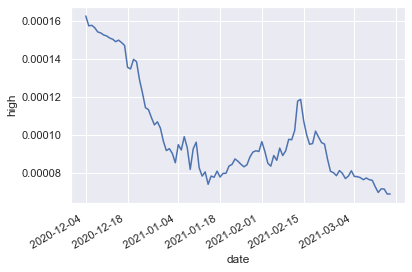

In [224]:
plot_time_series(df2,'date','high')

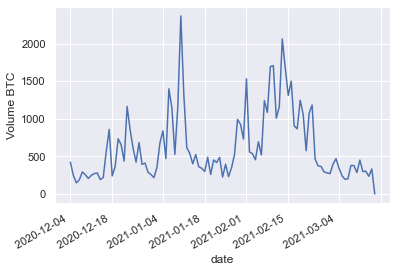

In [225]:
plot_time_series(df2,'date','Volume BTC')

________
________
________
### Backtesting

In [308]:
TP_init = 0.2 # take profit
SL_init = 0.3 # stop loss
cap = 10_000  # capital
laverage = 10 # laverage

In [325]:
def backtest(df, capital):
    initial_capital = capital
    open_operation = False
    for index, row in enumerate(df.values):
        Date = row[0]
        Open = row[1]
        High = row[2]
        Low  = row[3]
        Close = row[4]

        # buffer period
        if int(index) > 4 and int(index) < len(df.values)-1 : 

                # high 1 day before         and     high 2 day before
            if  High < df.values[index-1][2] and High < df.values[index-2][2]:

                # OPEN wait one day and short if the next candle is red
                if not open_operation and Close < df.values[index-1][4]:
                    open_operation = True
                    open_price = Close
                    print('\nopen operation : ',Date)
                    
                actual_price = Close
                
                #if capital!=initial_capital:print(capital) #debug and see if work
                
                if open_operation:
                    gain = (open_price - actual_price)*capital*laverage      
                    TP = TP_init*capital*laverage
                    SL = SL_init*capital*laverage
                    
                    
                    if (gain > TP_init or gain < -SL_init): # Close position 
                        capital += gain
                        open_operation = False
                        print('capital: \t', round(capital,2))
                        print('close operation : ',Date, ' gain: ',round(gain,3),'$')


In [326]:
backtest(df2,cap)


open operation :  2020-12-09 
capital: 	 10000.43
close operation :  2020-12-12   gain:  0.43 $

open operation :  2020-12-14 
capital: 	 10000.65
close operation :  2020-12-16   gain:  0.22 $

open operation :  2020-12-17 
capital: 	 10001.16
close operation :  2020-12-19   gain:  0.51 $

open operation :  2020-12-22 
capital: 	 10003.37
close operation :  2020-12-23   gain:  2.21 $

open operation :  2020-12-25 
capital: 	 10004.3
close operation :  2020-12-26   gain:  0.93 $

open operation :  2020-12-29 
capital: 	 10004.9
close operation :  2020-12-30   gain:  0.6 $

open operation :  2020-12-31 
capital: 	 10005.67
close operation :  2021-01-02   gain:  0.77 $

open operation :  2021-01-08 
capital: 	 10006.17
close operation :  2021-01-14   gain:  0.5 $

open operation :  2021-01-25 
capital: 	 10004.55
close operation :  2021-02-15   gain:  -1.621 $

open operation :  2021-02-16 
capital: 	 10005.12
close operation :  2021-02-21   gain:  0.57 $

open operation :  2021-02-22 
c

### Statistical tests

In [57]:
import random
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_ind
from scipy.stats import t

In [58]:
seed(1)

In [ ]:
# t_stat, p = ttest_ind(df['male'], df['female'])
# print(f't={t_stat}, p={p}')